# Ocean Optics Spectrometer

### This Notebook Shows how to capture a Spectrum with the Ocean Optics Spectrometer

In [1]:
import socket
import sys
import time
import numpy as np
from seabreeze.spectrometers import Spectrometer
from matplotlib import pyplot as plt
import pandas as pd

# Find Spectrometer
#### This code snipet finds the spectrometer. Only run once

#### Make sure to close Ocean view software before running

In [2]:
# this finds the connected spectrometer
spec= Spectrometer.from_first_available()
spec

<Spectrometer USB4000:FLMT08998>

In [3]:
# check integration time
spec.integration_time_micros(10000)

# Run Spectrometer

In [4]:
wav = spec.wavelengths()
print (wav)

[ 345.547824    345.7652642   345.98269179 ... 1040.00006121 1040.15971991
 1040.31935952]


In [5]:
#collect white balance
wb = spec.intensities()

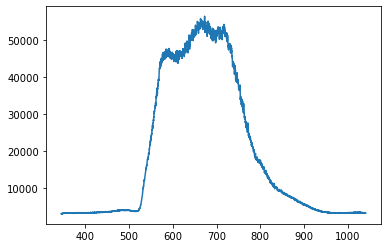

In [6]:
# check white balance spectrum
plt.plot(wav,wb)

In [7]:
# collect specimen
inten = spec.intensities()
print (inten)

[3020.90563657 3067.05569085 3022.8285555  ... 3142.04952906 3063.209853
 3063.209853  ]


In [8]:
# test loop
r = []

# (second) of the whole testing time
# average over the 20 times we measure

for i in range(300):
    sig= []
    for j in range(20):
        inten = spec.intensities()
        sig.append(inten)
    avg = np.average(sig, axis=0)    
    r.append(avg)
    time.sleep(1)
    
    

In [9]:
np.shape(r)


(300, 3648)

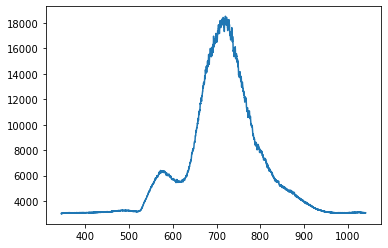

In [10]:
plt.plot(wav,r[0])


In [11]:
#normalized reflectance
ns = np.divide(r[0],wb)


In [12]:
print(ns)

[1.0229072  1.01523157 0.98805031 ... 0.96878049 0.9742831  0.9742831 ]


In [13]:
df={"wav":wav,"ns":ns}
df=pd.DataFrame(df)
df.to_csv('C:\\Users\\MFT\\Desktop\\MFT_jenny\\20230721.csv',index=False)

(450.0, 700.0)

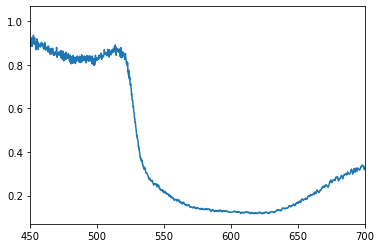

In [14]:
plt.plot(wav,ns)
plt.xlim(450,700)

(400.0, 1000.0)

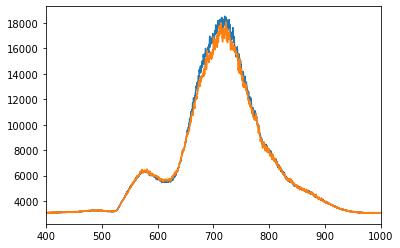

In [19]:
plt.plot(wav,r[0],wav,r[299])
plt.xlim(400,1000)

(400.0, 1000.0)

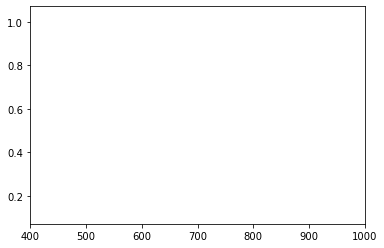

In [32]:
plt.plot(r[0]/wb, r[299]/wb)
plt.xlim(400,1000)

In [16]:
for i in range(80):
    if i == 0:
        inten = spec.intensities()
        ns = np.divide(inten,wb)
    else:
        inten = spec.intensities()
        ns2 = np.divide(inten,wb)
        ns = (ns2+ns)/(i+1)


    

    

In [10]:
np.savetxt('C:\\Users\\MFT\Desktop\\spectra\\JiangSiShiChang_Carmine_mockups_11Nov2022\\Carmine_1_I.txt', inten, delimiter=',')

In [11]:
np.savetxt('C:\\Users\\MFT\Desktop\\spectra\\JiangSiShiChang_Carmine_mockups_11Nov2022\\Carmine_1_wav.txt', wav, delimiter=',')